# 데이터 불러오기

In [401]:
from utils import import_train_data
df, test_df = import_train_data()
df.sample(10)

image_path  category target      r
314      data/숫자인식/03/n03/4d_n03_14.jpg    number      3  False
1834      data/알파벳인식/I/I/4d_al_I_23.jpg  alphabet      I  False
2230      data/알파벳인식/M/M/4d_al_M_09.jpg  alphabet      M  False
2589  data/알파벳인식/P/r_P/4d_al_r_P_19.jpg  alphabet      P   True
2581  data/알파벳인식/P/r_P/4d_al_r_P_10.jpg  alphabet      P   True
3383  data/알파벳인식/X/r_X/4d_al_r_X_12.jpg  alphabet      X   True
2465      data/알파벳인식/O/O/4d_al_O_45.jpg  alphabet      O  False
1337      data/알파벳인식/D/D/4d_al_D_37.jpg  alphabet      D  False
2833      data/알파벳인식/S/S/4d_al_S_12.jpg  alphabet      S  False
1593  data/알파벳인식/F/r_F/4d_al_r_F_38.jpg  alphabet      F   True

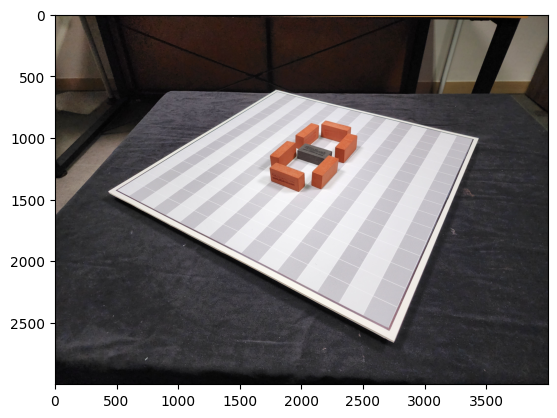

In [6]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread(df['image_path'].iloc[0])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

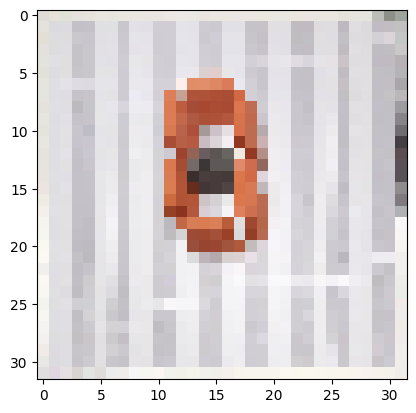

In [7]:
from preprocessing import img_transform

image = img_transform(image)
image_32 = cv2.resize(image, (32, 32))
plt.imshow(image_32)

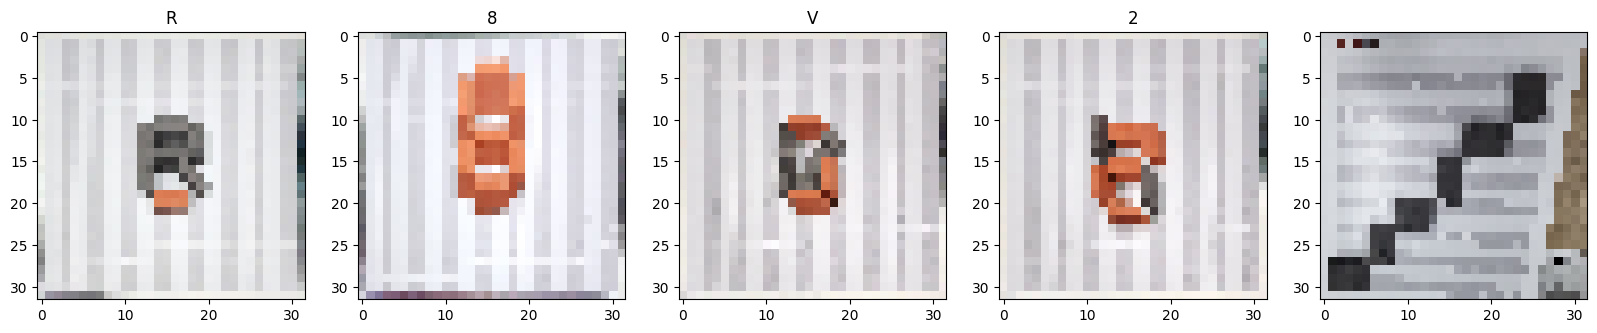

In [9]:
def view_sample(df, process, n=5):
    fig, ax = plt.subplots(1, n, figsize=(20, 20))

    sample = df.sample(n)
    for i, (_, row) in enumerate(sample.iterrows()):
        image = cv2.imread(row['image_path'])
        image = process(image)
        ax[i].imshow(image)
        ax[i].set_title(row['target'])

    plt.show()

def pipe(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img_transform(img)
    img = cv2.resize(img, (32, 32))
    return img

view_sample(df, pipe)

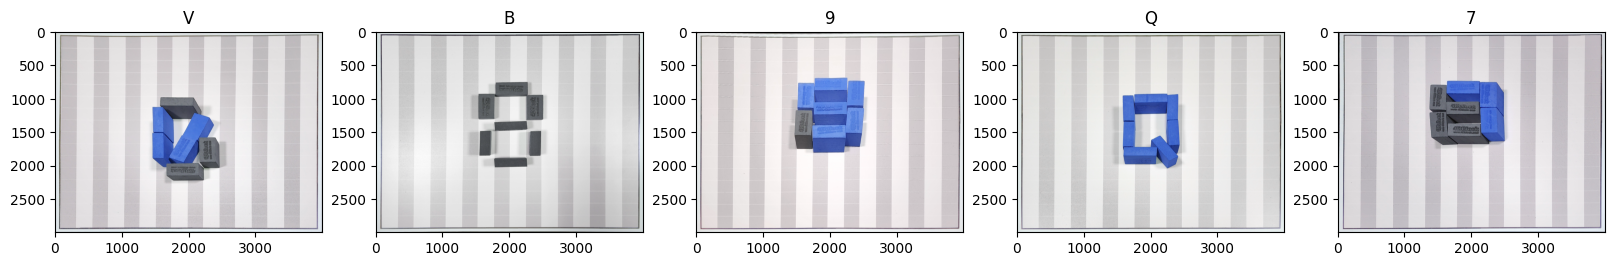

In [10]:
def pipe(image):
    image = img_transform(image)
    image = cv2.erode(image, (3, 3), iterations=3)
    return image

view_sample(df, pipe)

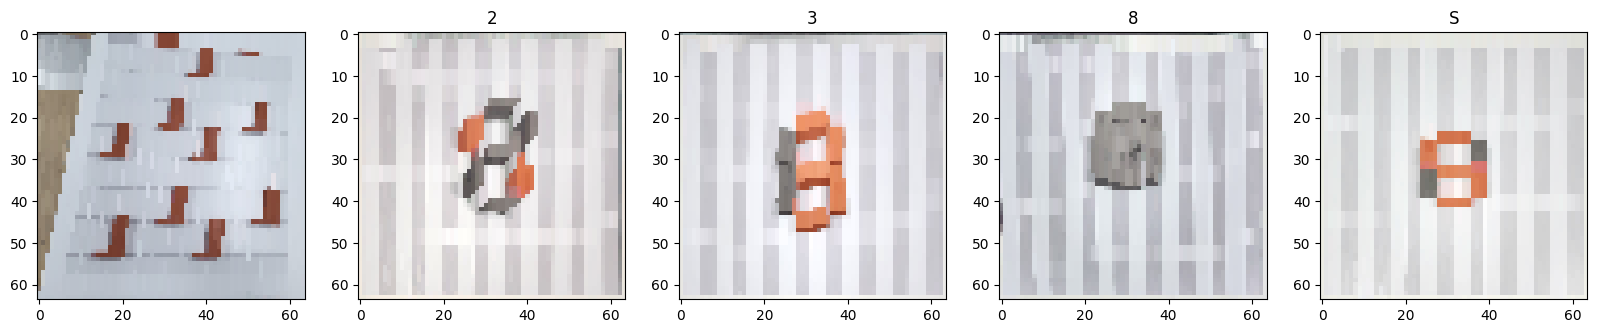

In [28]:
def pipe(image):
    image = preprocess_img(image, img_size=(64, 64))
    image = cv2.dilate(image, (3, 3), iterations=3)
    return image

view_sample(df, pipe)

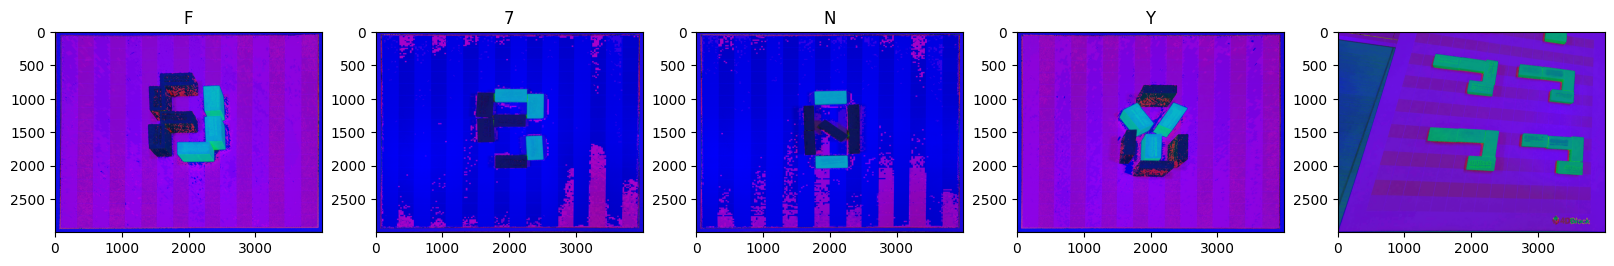

In [12]:
def pipe(image):
    image = img_transform(image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    return image
view_sample(df, pipe)

Attempt to segment the orange section

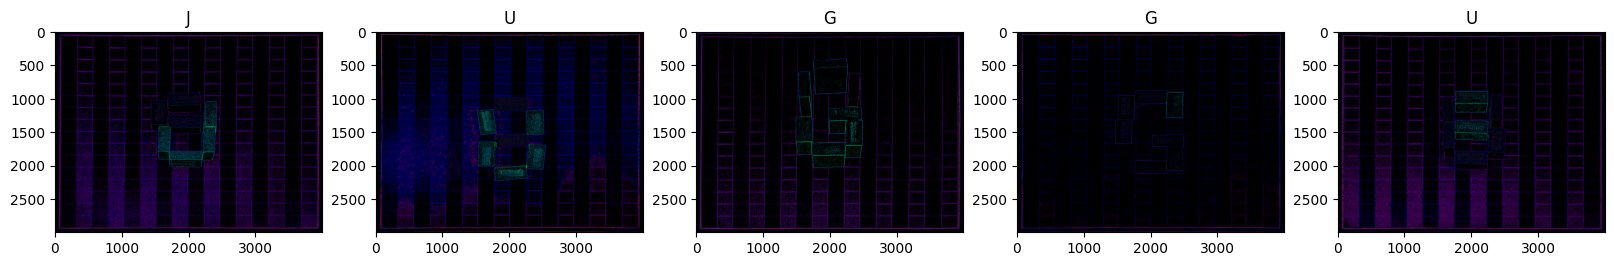

In [16]:
def segment(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hue, saturation, value = cv2.split(image)

    blockSize = 11
    C = 2
    adaptiveThresh = cv2.adaptiveThreshold(
        value, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, blockSize, C
    )
    adaptiveThresh = cv2.bitwise_not(adaptiveThresh)
    orange_segments = cv2.bitwise_and(image, image, mask=adaptiveThresh)

    return orange_segments

def pipe(image):
    image = img_transform(image)
    image = segment(image)
    return image

view_sample(df, pipe)

In [17]:
def get_limits(color):
    c = np.uint8([[color]])
    hsv_color = cv2.cvtColor(c, cv2.COLOR_BGR2HSV)

    lower_limit = hsv_color[0][0][0] - 10, 100, 100
    upper_limit = hsv_color[0][0][0] + 10, 255, 255

    lower_limit = np.array(lower_limit, dtype=np.uint8)
    upper_limit = np.array(upper_limit, dtype=np.uint8)

    return lower_limit, upper_limit

orange = (32, 42, 76)

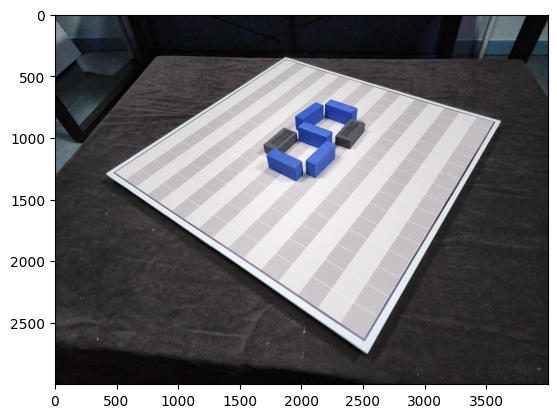

In [44]:
img = cv2.imread(df['image_path'].iloc[500])
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

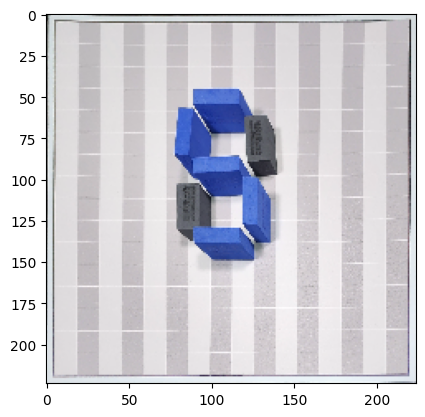

In [45]:
img = img_transform(img)
img = cv2.resize(img, (224, 224))
plt.imshow(img)

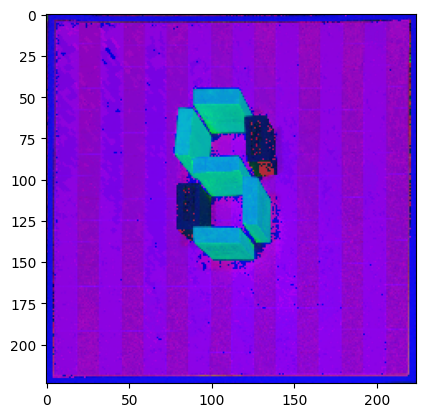

In [46]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(img_hsv)

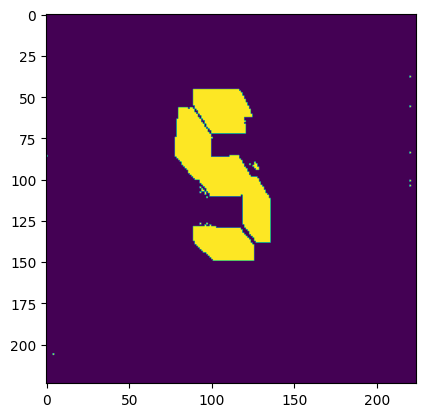

In [47]:
mask = cv2.inRange(img_hsv, np.array([0, 50, 50]), np.array([60, 255, 255]))
plt.imshow(mask)

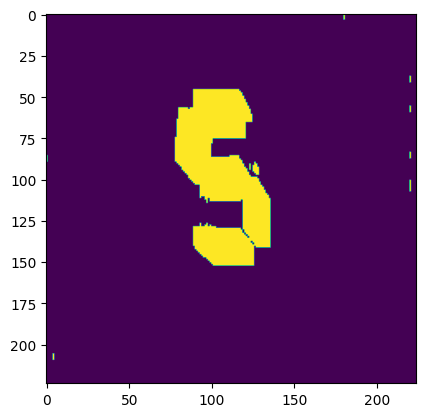

In [48]:
dilated_mask = cv2.dilate(mask, (10, 10), iterations=3)
plt.imshow(dilated_mask)

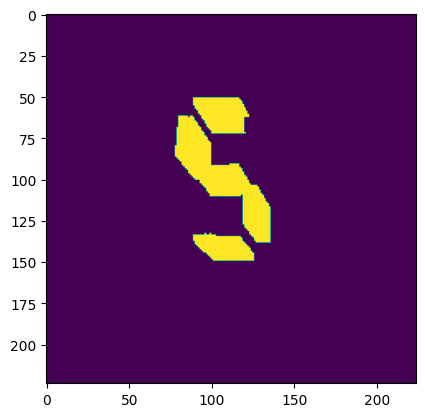

In [50]:
eroded_mask = cv2.erode(mask, (10, 10), iterations=5)
plt.imshow(eroded_mask)

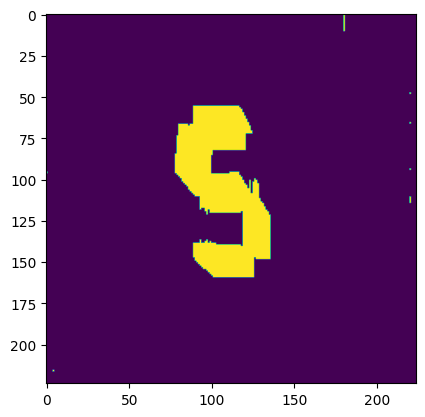

In [54]:
erolated_mask = cv2.dilate(mask, (5, 5), iterations=10)
erolated_mask = cv2.erode(erolated_mask, (5, 5), iterations=10)
plt.imshow(erolated_mask)

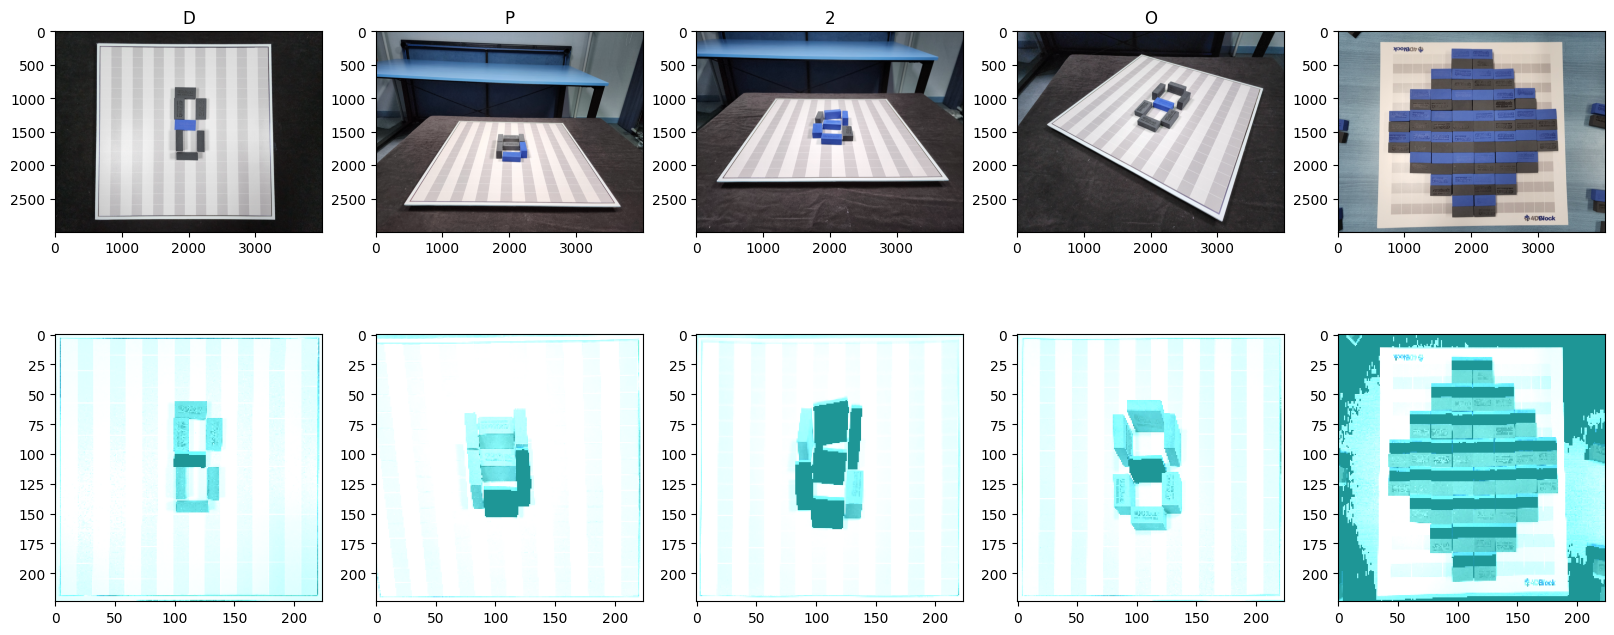

In [234]:
def pipe(image):
    image = img_transform(image)
    image = cv2.resize(image, (224, 224))
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv_image, np.array([0, 50, 50]), np.array([60, 255, 255]))
    mask = cv2.erode(mask, (3, 3), iterations=3)
    
    mask_img = np.zeros_like(image)
    mask_img[:] = (30, 150, 150)
    image = cv2.bitwise_and(image, image, mask=cv2.bitwise_not(mask))
    image = cv2.add(image, mask_img)

    return image

def view_sample_and_original(df, process_1, process_2, n=5):
    fig, ax = plt.subplots(2, n, figsize=(20, 8))

    sample = df.sample(n)
    for i, (_, row) in enumerate(sample.iterrows()):
        image = cv2.imread(row['image_path'])
        ax[0][i].imshow(process_1(image))
        ax[1][i].imshow(process_2(image))
        ax[0][i].set_title(row['target'])        

    plt.show()

view_sample_and_original(df, lambda x: x, pipe)

check smaller image size, 64x64

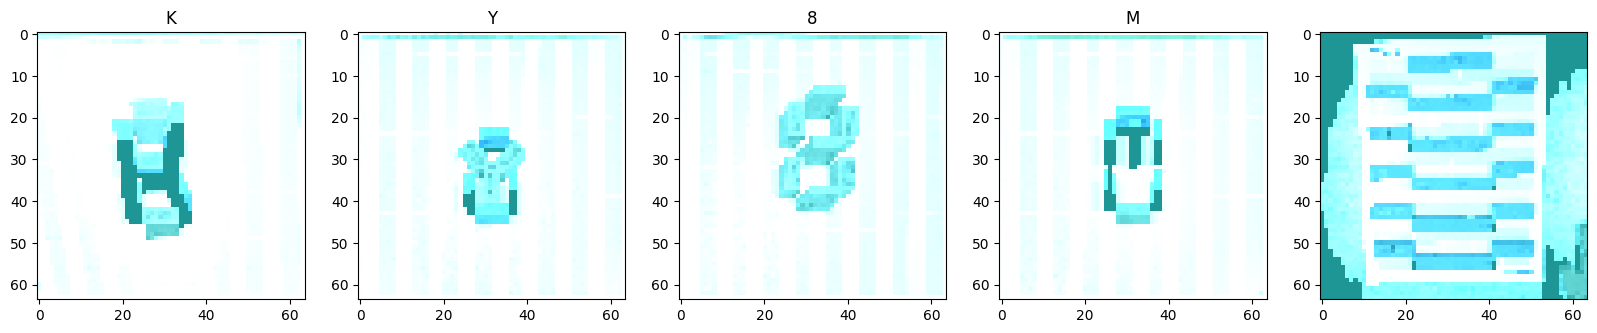

In [69]:
def pipe(image):
    image = img_transform(image)
    image = cv2.resize(image, (64, 64))
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv_image, np.array([0, 50, 50]), np.array([60, 255, 255]))
    mask = cv2.erode(mask, (3, 3), iterations=5)
    
    mask_img = np.zeros_like(image)
    mask_img[:] = (30, 150, 150)
    image = cv2.bitwise_and(image, image, mask=cv2.bitwise_not(mask))
    image = cv2.add(image, mask_img)

    return image

view_sample(df, pipe)

mask and then resize

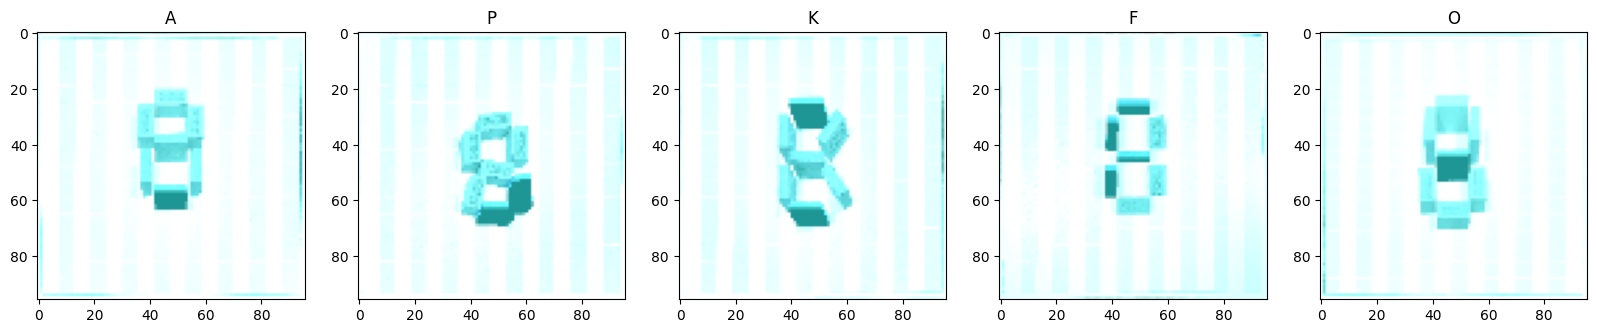

In [71]:
def pipe(image):
    image = img_transform(image)
    image = cv2.resize(image, (224, 224))
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv_image, np.array([0, 50, 50]), np.array([60, 255, 255]))
    mask = cv2.erode(mask, (10, 10), iterations=5)
    
    mask_img = np.zeros_like(image)
    mask_img[:] = (30, 150, 150)
    image = cv2.bitwise_and(image, image, mask=cv2.bitwise_not(mask))
    image = cv2.add(image, mask_img)
    
    image = cv2.resize(image, (96, 96))
    return image

view_sample(df, pipe)

Orange mask seems pretty good, now try to segment the gray section.

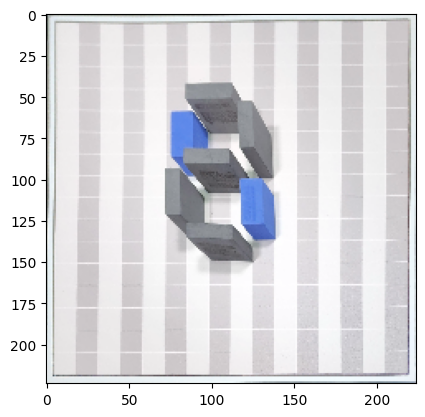

In [73]:
image = cv2.imread(df['image_path'].iloc[250])
image = img_transform(image)
image = cv2.resize(image, (224, 224))
plt.imshow(image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


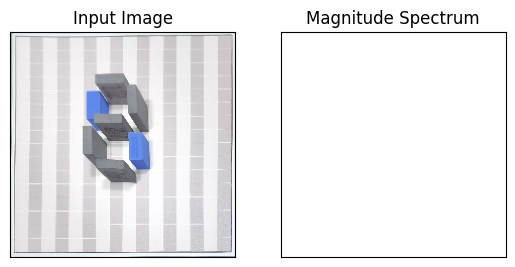

In [79]:
# fourier transform
f = np.fft.fft2(image)
fshift = np.fft.fftshift(f)

magnitude_spectrum = 20*np.log(np.abs(fshift)+1)

plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

plt.show()

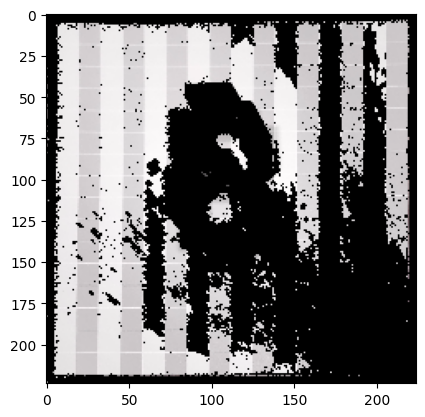

In [86]:
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

hist_hue = cv2.calcHist([hsv_image], [0], None, [256], [0, 256])

threshold = 0.8 * hist_hue.max()
lower = np.argmax(hist_hue > threshold)
upper = 255 - np.argmax(hist_hue[::-1] > threshold)

hue_mask = cv2.inRange(hsv_image, np.array([lower, 0, 0]), np.array([upper, 255, 255]))

segmented_image = cv2.bitwise_and(image, image, mask=hue_mask)

plt.imshow(segmented_image)

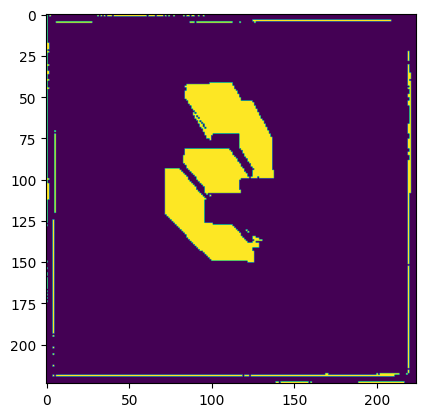

In [119]:
image = cv2.imread(df['image_path'].iloc[250])
image = img_transform(image)
image = cv2.resize(image, (224, 224))
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

mask = cv2.inRange(hsv_image, np.array([0, 0, 0]), np.array([255, 255, 170]))
plt.imshow(mask)

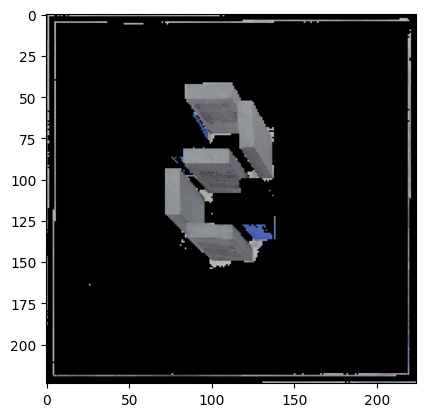

In [103]:
# remove mask from original image
mask_img = cv2.bitwise_and(image, image, mask=cv2.bitwise_not(mask))
plt.imshow(mask_img)

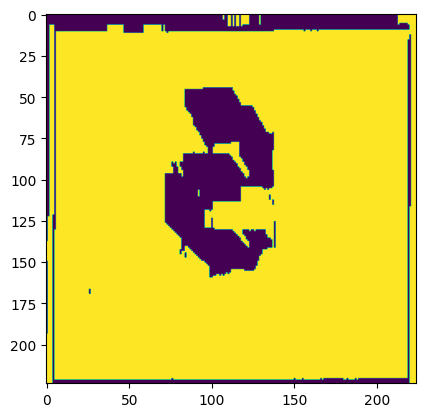

In [105]:
mask = cv2.dilate(mask, (10, 10), iterations=3)
plt.imshow(mask)

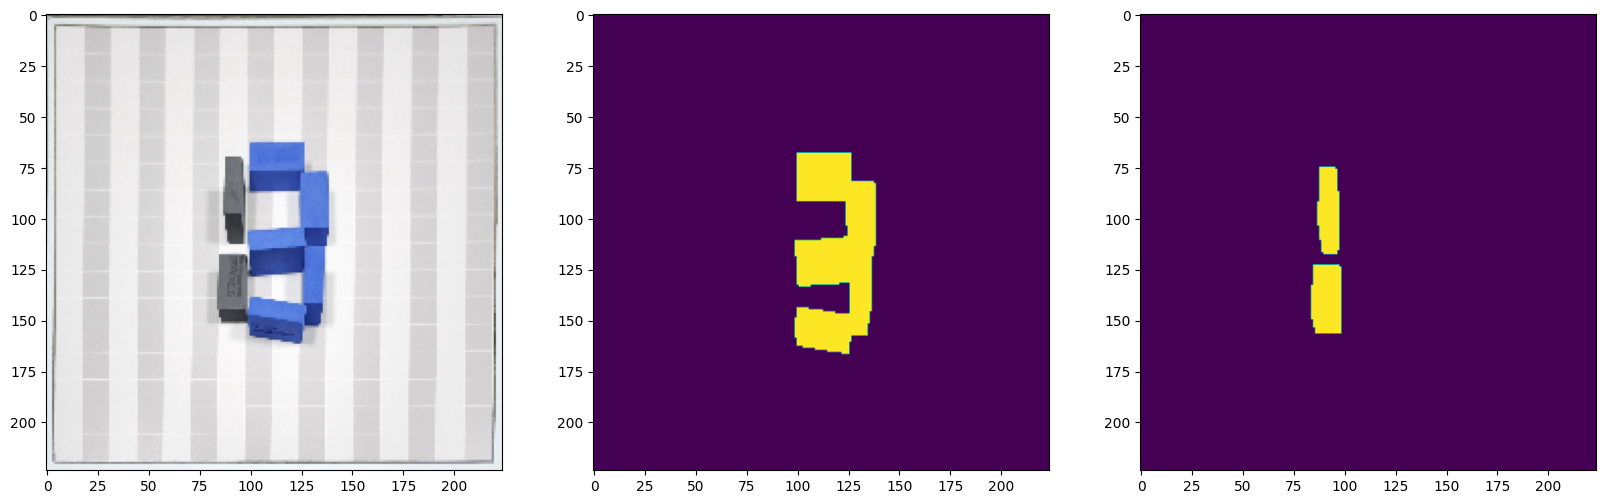

In [183]:
def get_masks(image):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    orange_mask = cv2.inRange(hsv_image, np.array([0, 50, 50]), np.array([60, 255, 255]))
    orange_mask = cv2.erode(orange_mask, (5, 5), iterations=5)
    orange_mask = cv2.dilate(orange_mask, (5, 5), iterations=5)

    gray_mask = cv2.inRange(hsv_image, np.array([0, 0, 0]), np.array([255, 255, 170]))
    gray_mask = cv2.bitwise_and(gray_mask, gray_mask, mask=cv2.bitwise_not(orange_mask))

    border = np.zeros_like(gray_mask)
    border[7:-7, 7:-7] = 255
    gray_mask = cv2.bitwise_and(gray_mask, gray_mask, mask=border)
    orange_mask = cv2.bitwise_and(orange_mask, orange_mask, mask=border)

    gray_mask = cv2.erode(gray_mask, (5, 5), iterations=5)
    gray_mask = cv2.dilate(gray_mask, (5, 5), iterations=5)

    return (orange_mask, gray_mask)

# display an image side by side with its masks
image = cv2.imread(df['image_path'].iloc[320])
image = img_transform(image)
image = cv2.resize(image, (224, 224))
orange, gray = get_masks(image)

fig, ax = plt.subplots(1, 3, figsize=(20, 20))
ax[0].imshow(image)
ax[1].imshow(orange)
ax[2].imshow(gray)

plt.show()


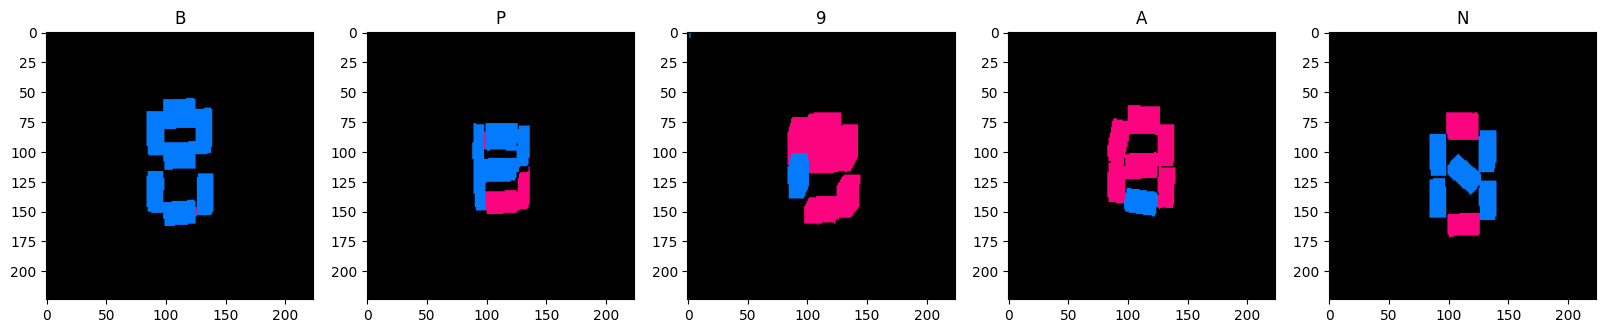

In [147]:
def draw_masks(image):
    image = img_transform(image)
    image = cv2.resize(image, (224, 224))
    orange_mask, gray_mask = get_masks(image)

    mask_img = np.ones_like(image)*255
    mask_img = cv2.bitwise_and(mask_img, mask_img, mask=orange_mask)
    mask_img[np.where(orange_mask != 0)] = [3, 123, 252]
    mask_img[np.where(gray_mask != 0)] = [252, 3, 127]

    return mask_img

def pipe(image):
    image = draw_masks(image)
    return image

view_sample(df, draw_masks)

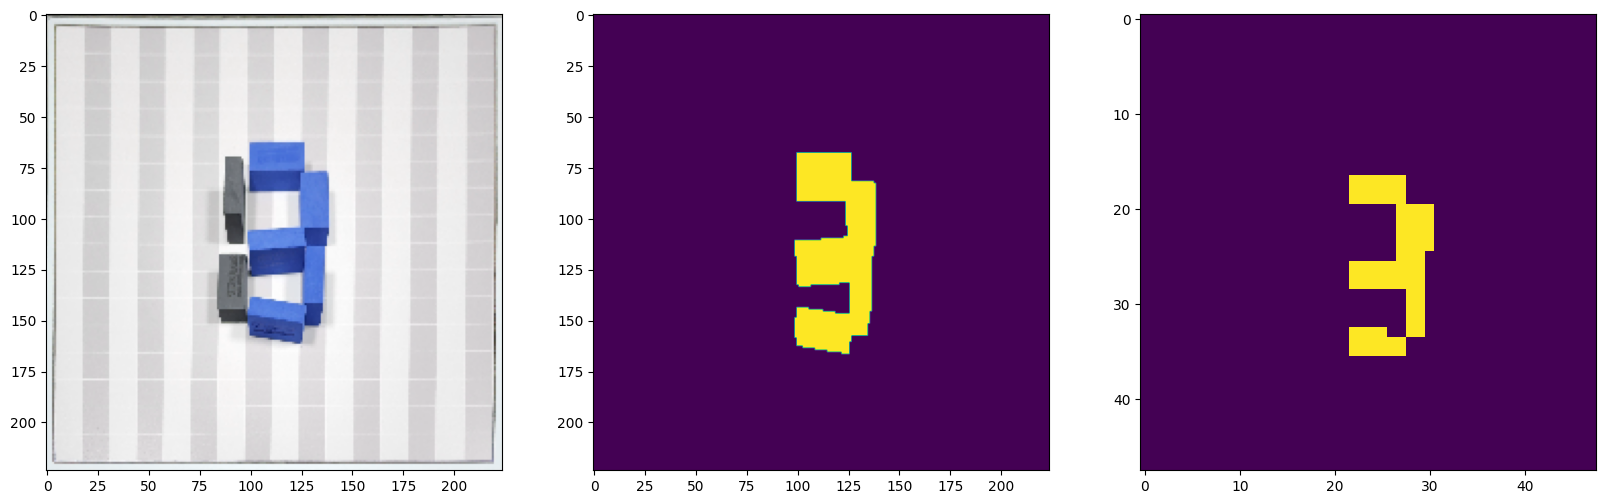

In [159]:
def mask_224_to_96(mask):
    mask = cv2.erode(mask, (3, 3), iterations=3)
    mask = cv2.resize(mask, (150, 150), interpolation=cv2.INTER_NEAREST)
    mask = cv2.erode(mask, (3, 3), iterations=3)
    mask = cv2.resize(mask, (96, 96), interpolation=cv2.INTER_NEAREST)
    mask = cv2.erode(mask, (3, 3), iterations=1)
    mask = cv2.resize(mask, (48, 48), interpolation=cv2.INTER_NEAREST)
    return mask

img = cv2.imread(df['image_path'].iloc[320])
img = img_transform(img)
img = cv2.resize(img, (224, 224))
orange, gray = get_masks(img)

fig, ax = plt.subplots(1, 3, figsize=(20, 20))
ax[0].imshow(img)
ax[1].imshow(orange)
ax[2].imshow(mask_224_to_96(orange))

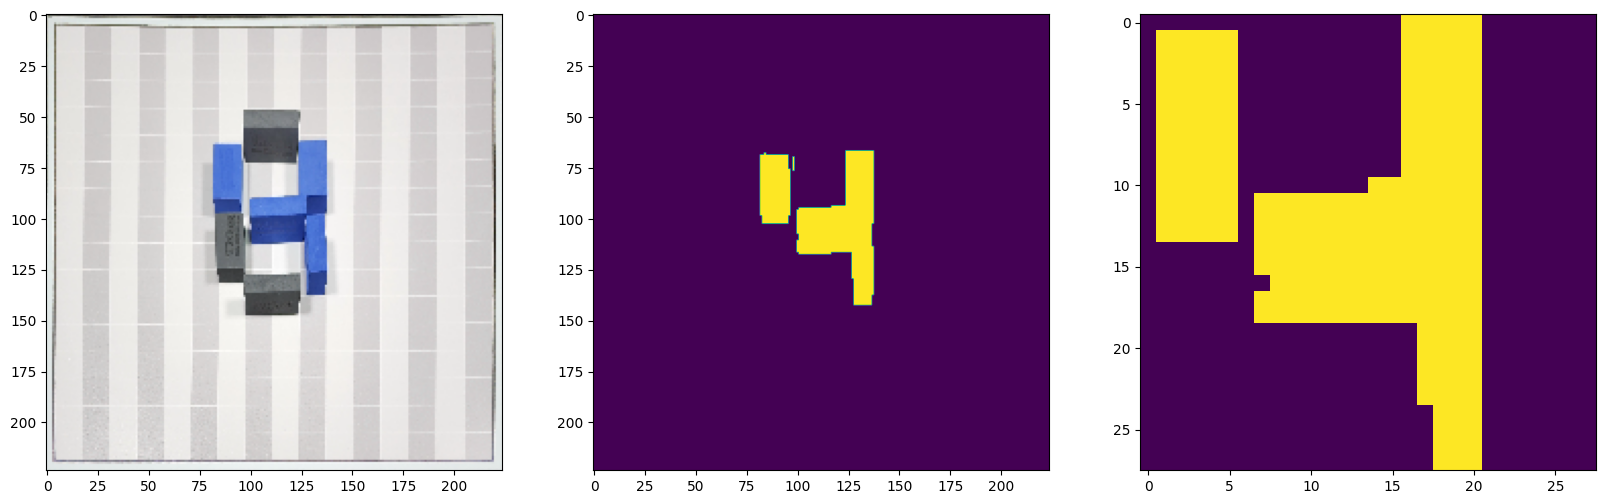

In [186]:
def mask_square(mask):
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    if len(contours) == 0:
        return mask

    min_x, min_y = mask.shape[1], mask.shape[0]
    max_x, max_y = 0, 0

    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        min_x = min(min_x, x)
        min_y = min(min_y, y)
        max_x = max(max_x, x+w)
        max_y = max(max_y, y+h)

    size = max(max_x - min_x, max_y - min_y)

    if min_x - size // 2 < 0:
        min_x = 0
    if min_y - size // 2 < 0:
        min_y = 0
    if max_x + size // 2 > mask.shape[1]:
        max_x = mask.shape[1]
    if max_y + size // 2 > mask.shape[0]:
        max_y = mask.shape[0]

    x_square = x + (w - size)//2
    y_square = y + (h - size)//2

    square_mask = mask[y_square:y_square+size, x_square:x_square+size]

    return square_mask

img = cv2.imread(df['image_path'].iloc[420])
img = img_transform(img)
img = cv2.resize(img, (224, 224))
orange, gray = get_masks(img)

fig, ax = plt.subplots(1, 3, figsize=(20, 20))
ax[0].imshow(img)
ax[1].imshow(orange)
ax[2].imshow(cv2.resize(mask_square(orange), (28, 28), interpolation=cv2.INTER_NEAREST))

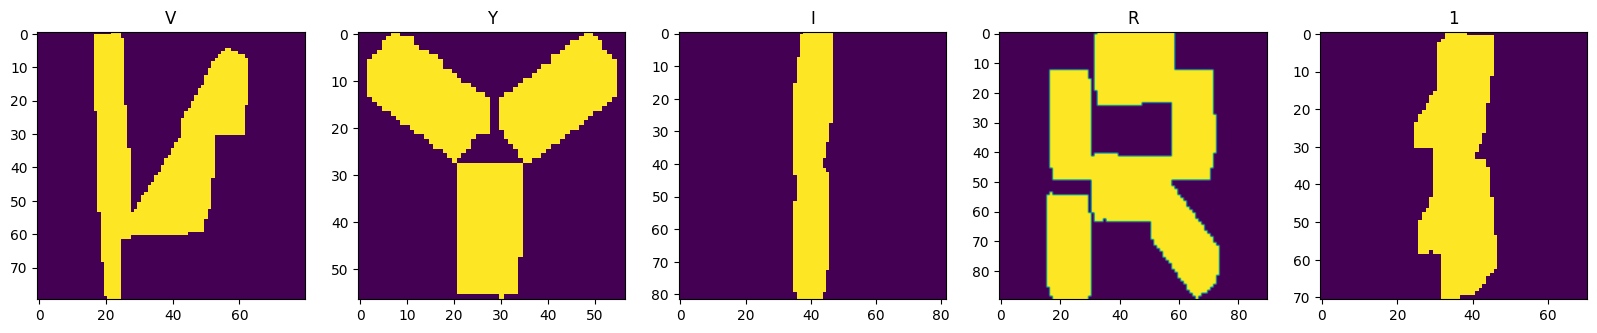

In [188]:
def pipe(image):
    image = img_transform(image)
    image = cv2.resize(image, (224, 224))
    orange, _ = get_masks(image)
    orange = cv2.dilate(orange, (5, 5), iterations=1)
    orange = cv2.erode(orange, (5, 5), iterations=1)
    orange = cv2.dilate(orange, (5, 5), iterations=1)
    orange = mask_square(orange)
    return orange

view_sample(df[df['r']==False], pipe)

## Cleanup

In [384]:
def get_masks(image):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    orange_mask = cv2.inRange(hsv_image, np.array([0, 50, 50]), np.array([60, 255, 255]))

    gray_mask = cv2.inRange(hsv_image, np.array([0, 0, 0]), np.array([255, 255, 165]))
    gray_mask = cv2.bitwise_and(gray_mask, gray_mask, mask=cv2.bitwise_not(orange_mask))

    return (orange_mask, gray_mask)

def clean_mask(mask):
    border = np.zeros_like(mask)
    border[7:-7, 7:-7] = 255

    mask = cv2.bitwise_and(mask, mask, mask=border)

    mask = cv2.erode(mask, (3, 3), iterations=3)

    return mask
    
def mask_square(mask):
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    if len(contours) == 0:
        return mask

    min_x, min_y = mask.shape[1], mask.shape[0]
    max_x, max_y = 0, 0

    # Initialize variables to find the center of all contours
    total_x, total_y = 0, 0
    total_contours = 0

    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        min_x = min(min_x, x)
        min_y = min(min_y, y)
        max_x = max(max_x, x + w)
        max_y = max(max_y, y + h)

        # Calculate the center of the contour
        center_x = x + w // 2
        center_y = y + h // 2

        # Accumulate center coordinates
        total_x += center_x
        total_y += center_y
        total_contours += 1

    # Calculate the center of all contours
    if total_contours > 0:
        center_x = total_x // total_contours
        center_y = total_y // total_contours
    else:
        # No contours found, use the center of the image
        center_x = mask.shape[1] // 2
        center_y = mask.shape[0] // 2

    # Calculate the maximum distance from the center to the contour's edge
    max_distance = max(max_x - center_x, center_x - min_x, max_y - center_y, center_y - min_y)

    # Calculate the size of the square based on the maximum distance
    size = 2 * max_distance

    # Ensure the square region is fully contained within the image
    if center_x - size // 2 < 0:
        center_x = size // 2
    if center_y - size // 2 < 0:
        center_y = size // 2
    if center_x + size // 2 > mask.shape[1]:
        center_x = mask.shape[1] - size // 2
    if center_y + size // 2 > mask.shape[0]:
        center_y = mask.shape[0] - size // 2

    # Calculate the coordinates for the square region
    x_square = center_x - size // 2
    y_square = center_y - size // 2

    square_mask = mask[y_square:y_square+size, x_square:x_square+size]

    return square_mask

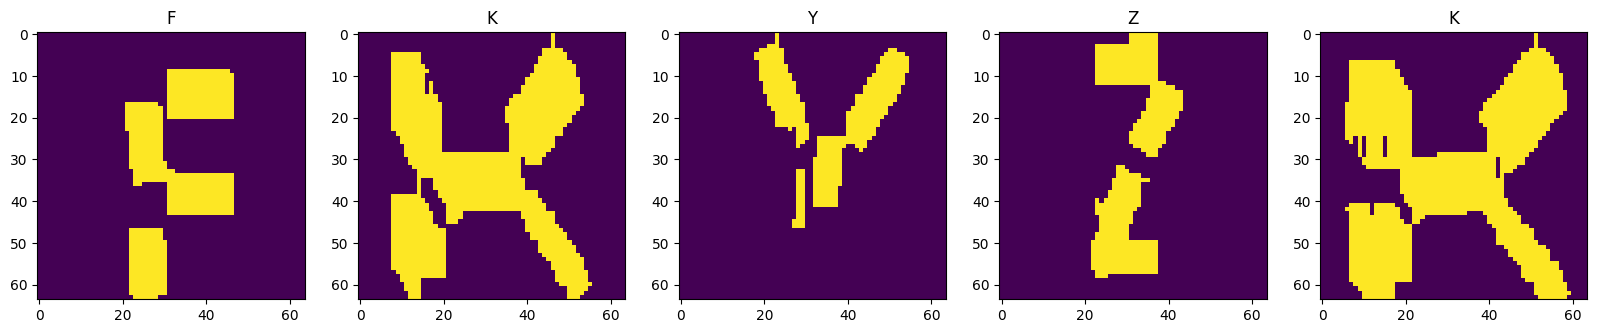

In [380]:
def pipe(image):
    image = img_transform(image)
    image = cv2.resize(image, (224, 224))
    orange, gray = get_masks(image)
    gray = clean_mask(gray)
    if (gray==0).all(): return np.zeros((64, 64))
    gray = mask_square(gray)
    gray = cv2.erode(gray, (3, 3), iterations=1)
    gray = cv2.dilate(gray, (3, 3), iterations=1)
    gray = cv2.erode(gray, (3, 3), iterations=2)
    gray = cv2.resize(gray, (64, 64), interpolation=cv2.INTER_NEAREST)
    #gray = cv2.resize(gray, (32, 32), interpolation=cv2.INTER_NEAREST)
    return gray

view_sample(df[df['r']==True], pipe)

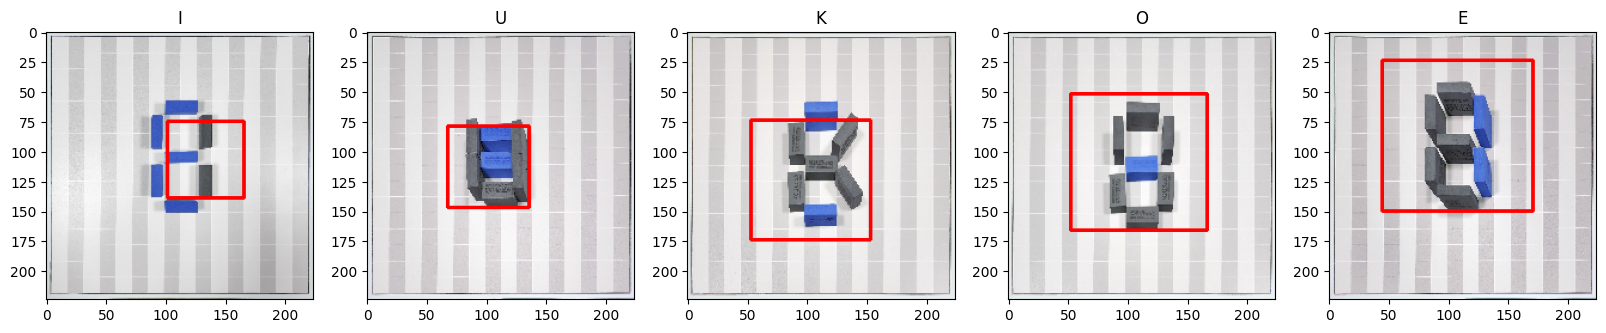

In [398]:
def mask_square_points(mask):
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    if len(contours) == 0:
        return mask

    min_x, min_y = mask.shape[1], mask.shape[0]
    max_x, max_y = 0, 0

    # Initialize variables to find the center of all contours
    total_x, total_y = 0, 0
    total_contours = 0

    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        min_x = min(min_x, x)
        min_y = min(min_y, y)
        max_x = max(max_x, x + w)
        max_y = max(max_y, y + h)

        # Calculate the center of the contour
        center_x = x + w // 2
        center_y = y + h // 2

        # Accumulate center coordinates
        total_x += center_x
        total_y += center_y
        total_contours += 1

    # Calculate the center of all contours
    if total_contours > 0:
        center_x = total_x // total_contours
        center_y = total_y // total_contours
    else:
        # No contours found, use the center of the image
        center_x = mask.shape[1] // 2
        center_y = mask.shape[0] // 2

    # Calculate the maximum distance from the center to the contour's edge
    max_distance = max(max_x - center_x, center_x - min_x, max_y - center_y, center_y - min_y)

    # Calculate the size of the square based on the maximum distance
    size = 2 * max_distance

    # Ensure the square region is fully contained within the image
    if center_x - size // 2 < 0:
        center_x = size // 2
    if center_y - size // 2 < 0:
        center_y = size // 2
    if center_x + size // 2 > mask.shape[1]:
        center_x = mask.shape[1] - size // 2
    if center_y + size // 2 > mask.shape[0]:
        center_y = mask.shape[0] - size // 2

    # Calculate the coordinates for the square region
    x_square = center_x - size // 2
    y_square = center_y - size // 2

    return y_square, y_square+size, x_square, x_square+size

def squares_pipe(image):
    image = img_transform(image)
    image = cv2.resize(image, (224, 224))
    orange, gray = get_masks(image)
    gray = clean_mask(gray)
    gray = cv2.erode(gray, (3, 3), iterations=3)
    if (gray==0).all(): return np.zeros((64, 64))
    y1, y2, x1, x2 = mask_square_points(gray)
    cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)
    return image

view_sample(df[df['r']==True], squares_pipe)

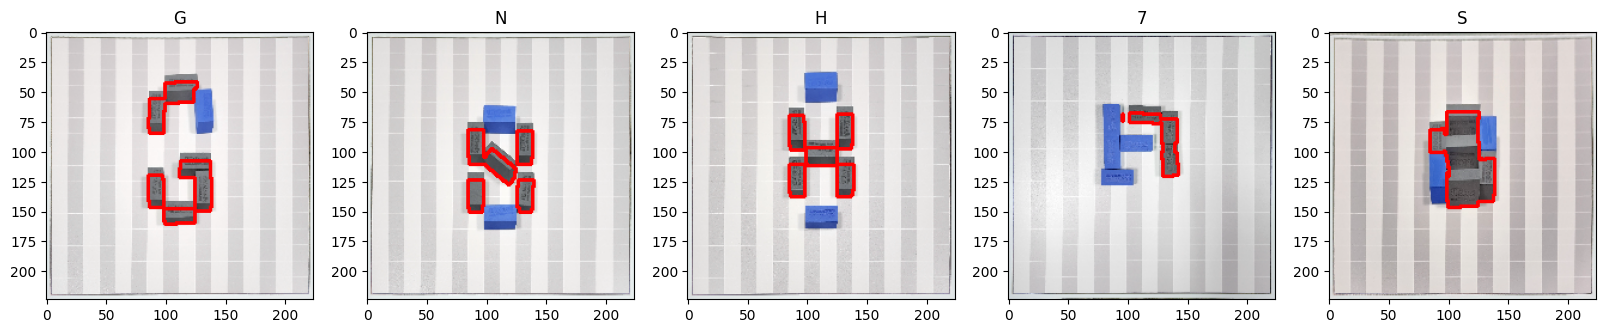

In [392]:
def contours_pipe(image):
    image = img_transform(image)
    image = cv2.resize(image, (224, 224))
    orange, gray = get_masks(image)
    gray = clean_mask(gray)
    gray = cv2.erode(gray, (3, 3), iterations=3)
    if (gray==0).all(): return np.zeros((64, 64))

    contours, _ = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(image, contours, -1, (255, 0, 0), 2)
    return image

view_sample(df[df['r']==True], contours_pipe)

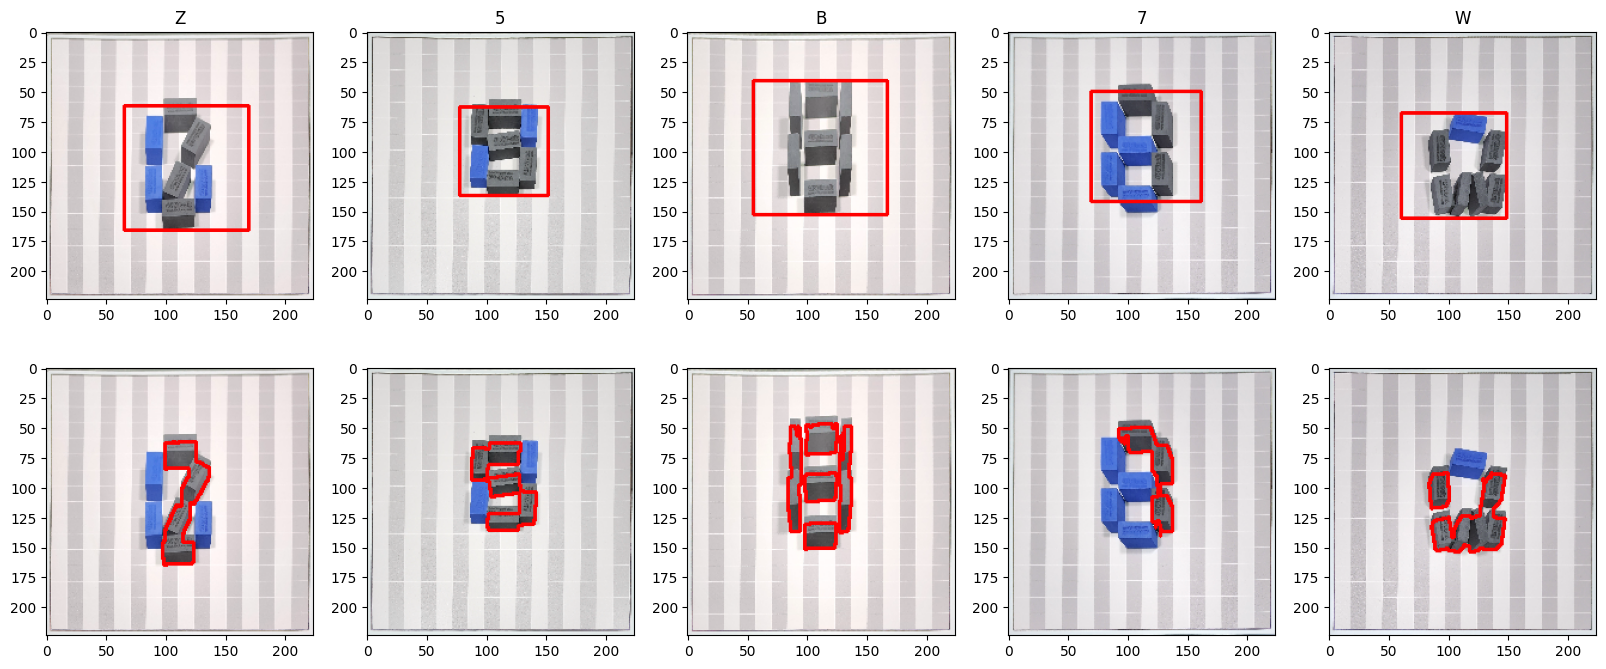

In [399]:
view_sample_and_original(df[df['r']==True], squares_pipe, contours_pipe)

Resizing before masking

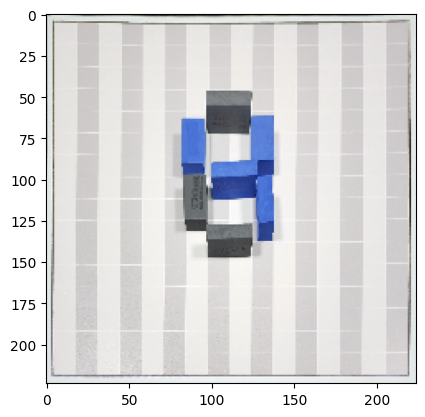

In [410]:
img = cv2.imread(df['image_path'].iloc[420])
img = img_transform(img)
img = cv2.resize(img, (224, 224))
plt.imshow(img)

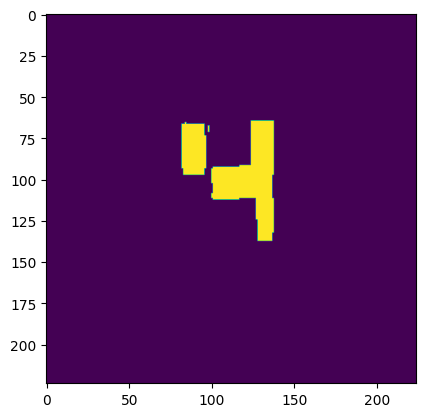

In [411]:
orange, gray = get_masks(img)
orange = clean_mask(orange)
plt.imshow(orange)

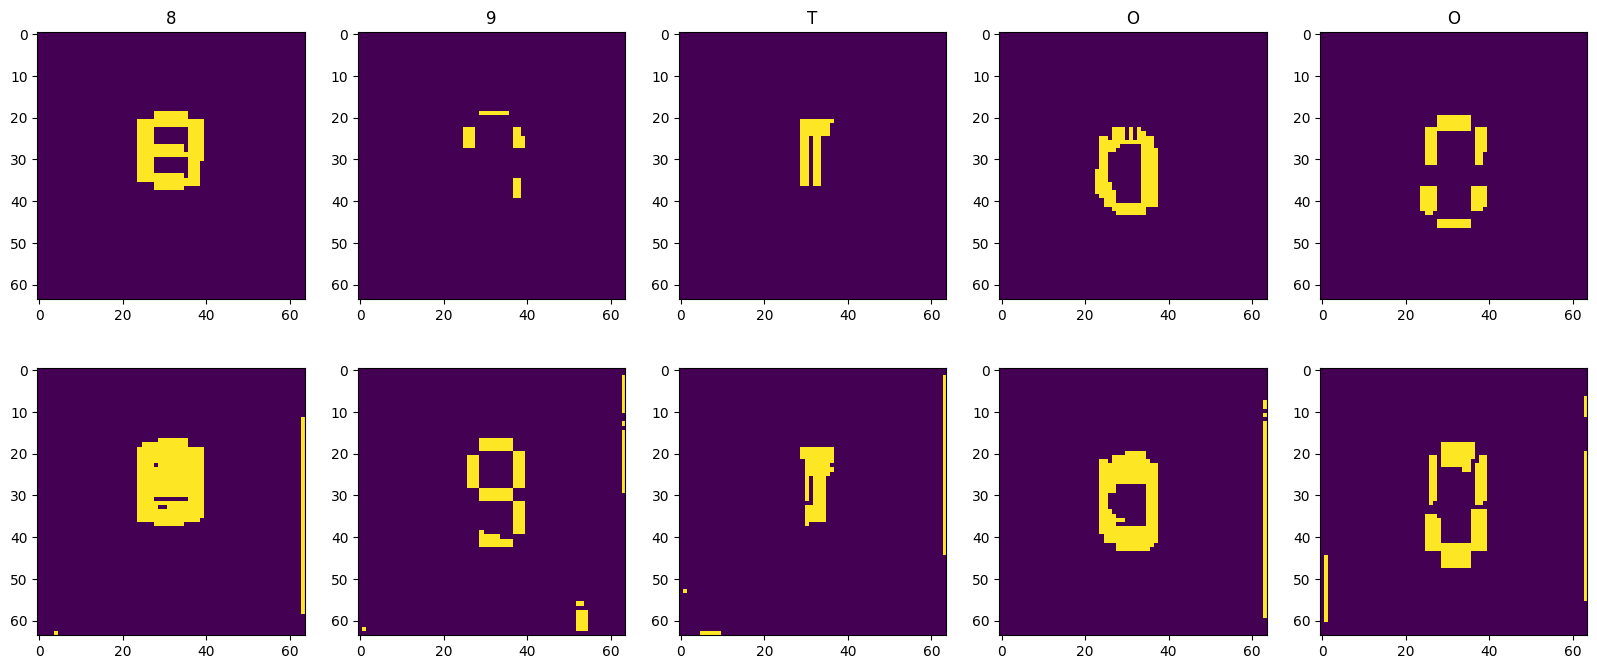

In [407]:
def pipe_before(img):
    img = img_transform(img)
    img = cv2.resize(img, (64, 64))
    orange, gray = get_masks(img)
    gray = clean_mask(gray)
    return gray

def pipe_after(img):
    img = img_transform(img)
    orange, gray = get_masks(img)
    gray = clean_mask(gray)
    gray = cv2.resize(gray, (64, 64), interpolation=cv2.INTER_NEAREST)
    return gray

view_sample_and_original(df[df['r']==True], pipe_before, pipe_after)

optimal: original -> 224 -> mask -> smaller ?

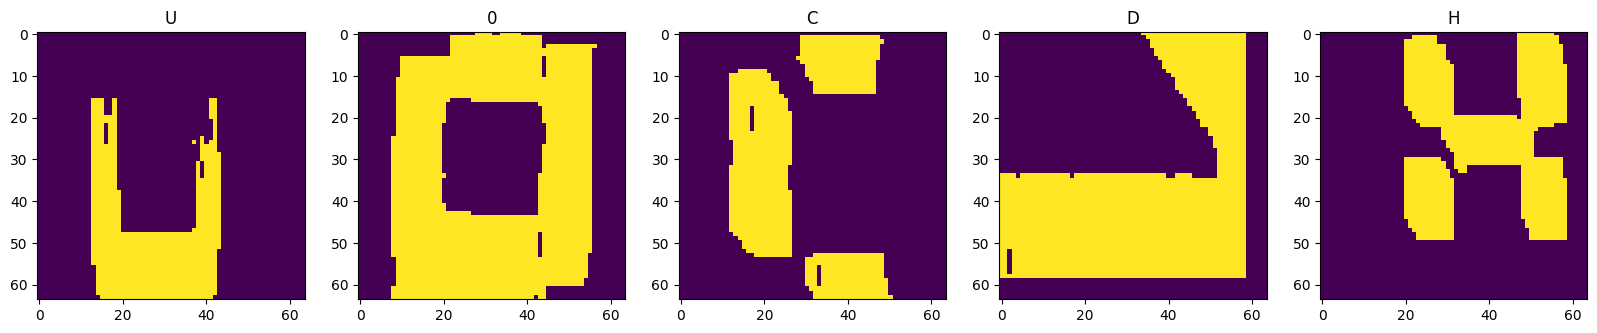

In [415]:
def pipe(img):
    img = img_transform(img)
    img = cv2.resize(img, (224, 224))
    orange, gray = get_masks(img)
    gray = clean_mask(gray)
    gray = cv2.erode(gray, (3, 3), iterations=3)
    gray = mask_square(gray)
    gray = cv2.resize(gray, (64, 64), interpolation=cv2.INTER_NEAREST)
    return gray

view_sample(df[df['r']==True], pipe)